Function to do the cluster identification with DBSCAN:

In [2]:
def dbscan(crds):
    bad_xy = []  #might need to change this
    X = np.array(crds)
    db = DBSCAN(eps=18, min_samples=3).fit(X)
    core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
    core_samples_mask[db.core_sample_indices_] = True
    labels = db.labels_
    
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    unique_labels = set(labels)
    
    colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
    
    for k, col in zip(unique_labels, colors):
        if k == -1:
            # Black used for noise.
            col = 'k'

        class_member_mask = (labels == k)
        
        # These are the definitely "good" xy values.
        xy = X[class_member_mask & core_samples_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
                 markeredgecolor='k', markersize=14)
        #print("\n Good? xy = ",xy)
        #print("X = ",X)
        # These are the "bad" xy values. Note that some maybe-bad and maybe-good are included here.
        xy = X[class_member_mask & ~core_samples_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
                 markeredgecolor='k', markersize=6)
        #print("\n Bad? xy = ",xy)
        bad_xy.append(xy)

    plt.title('Estimated number of clusters: %d' % n_clusters_)
    plt.xlim(0, 512)
    plt.ylim(0, 384)
    
    clusters = [X[labels == i] for i in range(n_clusters_)]
    #print(clusters)
    #print(db.labels_)
    
    return clusters, labels

Import the classifications into a pandas DataFrame.  I'm using header=None because there were no headings in the csv file:

In [3]:
import pandas as pd
df=pd.read_csv('averages-strike1.csv', sep=',',header=None)

This is the main part of the code that ends up calling the dbscan function at the end:

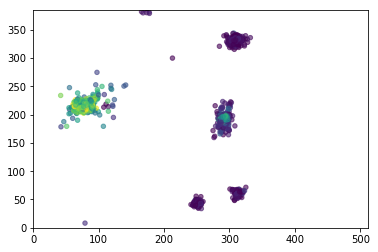

/Users/amorriso/anaconda/lib/python3.6/site-packages/matplotlib/lines.py:1206: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if self._markerfacecolor != fc:


In [4]:
from matplotlib.patches import Ellipse
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as col
cmap_1 = cm.ScalarMappable(col.Normalize(1, 11, cm.gist_rainbow))
import numpy as np
from sklearn.cluster import DBSCAN

x_val = []
y_val = []
frng = []
crds = []
ell = []

for centers in df.values:
    x_val.append(centers[0])
    y_val.append(centers[1])
    frng.append(centers[3])
    crds.append([centers[0], centers[1]])
    ell.append(Ellipse(xy=[centers[0], centers[1]], width=centers[4], height=centers[5], angle=centers[6]))
    centers_raw = {'XVal': x_val,
                   'YVal': y_val,
                   'Fringe': frng}
    
centers_df = pd.DataFrame(centers_raw, columns=['XVal', 'YVal', 'Fringe'])
plt.figure(0)
plt.scatter(centers_df.XVal, centers_df.YVal, s=20, c=cmap_1.to_rgba(centers_df.Fringe), alpha=.6)
plt.xlim(0, 512)
plt.ylim(0, 384)
#plt.title('Subject id = %s'%(coords_x[0][2]))
plt.show()
#print(crds)
plt.figure(1)
clusters, labels = dbscan(crds)

Check the DataFrame once, and then check it again after renaming the columns:

In [5]:
df[:15]

,0,1,2,3,4,5,6
0,107.716469,213.009577,06240907_proc_00254.png,1.000000,85.034929,67.943204,-47.505782
1,114.698967,213.766703,06240907_proc_00258.png,1.333333,67.924027,67.389913,-51.659952
2,111.190662,218.375451,06240907_proc_00270.png,0.714286,67.455082,57.088226,-63.335567
3,113.800339,223.653310,06240907_proc_00276.png,8.333333,86.160744,73.501320,-73.822837
4,88.625250,218.599081,06240907_proc_00279.png,7.200000,119.292404,107.265178,-76.700412
5,81.290269,220.570363,06240907_proc_00281.png,7.333333,115.024131,109.400213,-91.981419
6,81.476925,215.762886,06240907_proc_00282.png,6.166667,115.916690,111.225947,-51.426068
7,72.502562,219.822452,06240907_proc_00292.png,7.200000,115.302500,108.964856,-54.631973
8,71.396729,213.876289,06240907_proc_00295.png,7.000000,132.873660,114.236231,-88.764995
9,73.012500,206.005209,06240907_proc_00299.png,10.000000,116.456652,113.427691,-82.312357


In [6]:
labels

array([0, 0, 0, ..., 0, 1, 3])

These next two lines are the magic that connect the clusters identified by DBSCAN with the original classifications so that we can plot the fringe measurements for each cluster over time.

Finally figured this out by reading the question posted here: https://datascience.stackexchange.com/questions/29587/python-clustering-and-labels

In [7]:
cluster=pd.Series(labels)
df["cluster"] = cluster

Rename the DataFrame columns:

In [8]:
df = df.rename(index=str, columns={0: "x", 1: "y",2:"filename", 3:"fringe",4:"rx", 5:"ry",6:"angle"})

Assign each cluster its own variable:

In [9]:
cluster0 = df[df['cluster']==0]
cluster1 = df[df['cluster']==1]
cluster2 = df[df['cluster']==2]
cluster3 = df[df['cluster']==3]
cluster4 = df[df['cluster']==4]
cluster5 = df[df['cluster']==5]
cluster6 = df[df['cluster']==6]
cluster7 = df[df['cluster']==7]

Make plots!!!

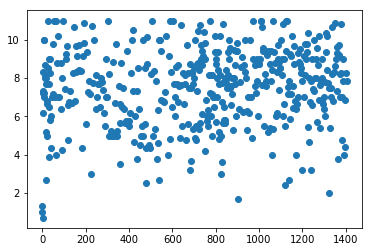

In [18]:
plt.scatter(cluster0.index, cluster0.fringe)
plt.show()

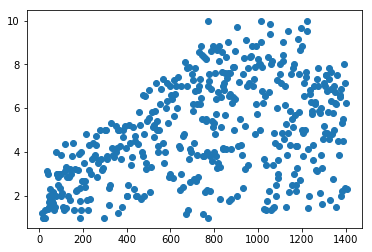

In [19]:
plt.scatter(cluster1.index, cluster1.fringe)
plt.show()

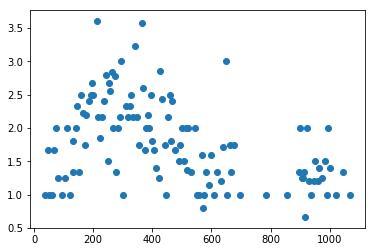

In [12]:
plt.scatter(cluster2.index, cluster2.fringe)
plt.show()

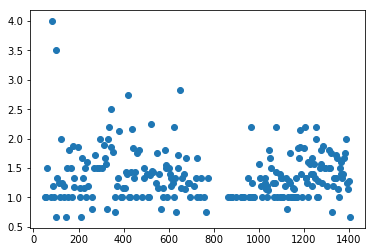

In [13]:
plt.scatter(cluster3.index, cluster3.fringe)
plt.show()

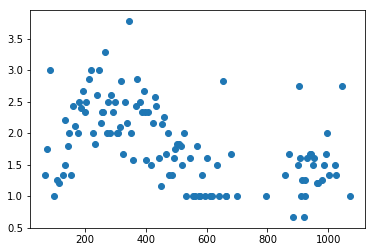

In [14]:
plt.scatter(cluster4.index, cluster4.fringe)
plt.show()

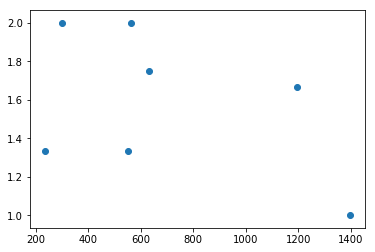

In [15]:
plt.scatter(cluster5.index, cluster5.fringe)
plt.show()

In [20]:
cluster1

,x,y,filename,fringe,rx,ry,angle,cluster
14,286.998737,170.834790,06240907_proc_00307.png,1.200000,34.312887,32.881617,-0.016536,1
20,290.446798,164.354741,06240907_proc_00322.png,1.000000,41.404996,20.702498,-1.341341,1
24,274.812500,171.712382,06240907_proc_00337.png,1.000000,52.950755,26.475377,14.871776,1
27,278.061211,215.533440,06240907_proc_00339.png,1.000000,55.470401,37.840105,-8.483857,1
29,298.794362,184.781204,06240907_proc_00352.png,1.333333,43.936355,42.192673,154.829077,1
36,289.011220,170.453302,06240907_proc_00364.png,3.142857,47.462901,33.124566,-87.445480,1
40,299.275809,171.933762,06240907_proc_00379.png,3.000000,74.282761,48.552871,-21.421996,1
42,276.272498,159.376666,06240907_proc_00384.png,1.400000,58.474240,31.838820,4.557883,1
43,302.872501,220.976666,06240907_proc_00384.png,2.000000,65.252534,34.846801,10.221508,1
45,289.311907,213.051337,06240907_proc_00389.png,1.714286,56.384458,39.136334,25.140680,1


In [17]:
#cluster3.to_csv('spnet-strike1-cluster3.csv')

In [21]:
cluster1.to_csv('averages-strike1-cluster1.csv')